In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
df=pd.read_csv("train_v9rqX0R (1).csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* There are 5 numerical columns and 7 categorical columns
* Item weight and Outlet size have missing values 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


* Item visibility have zeros 
* Item visibility and Item Outlet Sales have outliers 


In [5]:
def uni(df,r,c):
    it=1
    col=df.select_dtypes(np.number).columns
    plt.figure(figsize=(10,8))
    for i in col:
        plt.subplot(r,c,it)
        sns.distplot(df[i],color="purple")
        plt.title(f"Mean : {round(df[i].mean(),2)} skew : {round(df[i].skew(),2)} kurt : {round(df[i].kurt(),2)}")
        it+=1
    plt.tight_layout()
    plt.show()

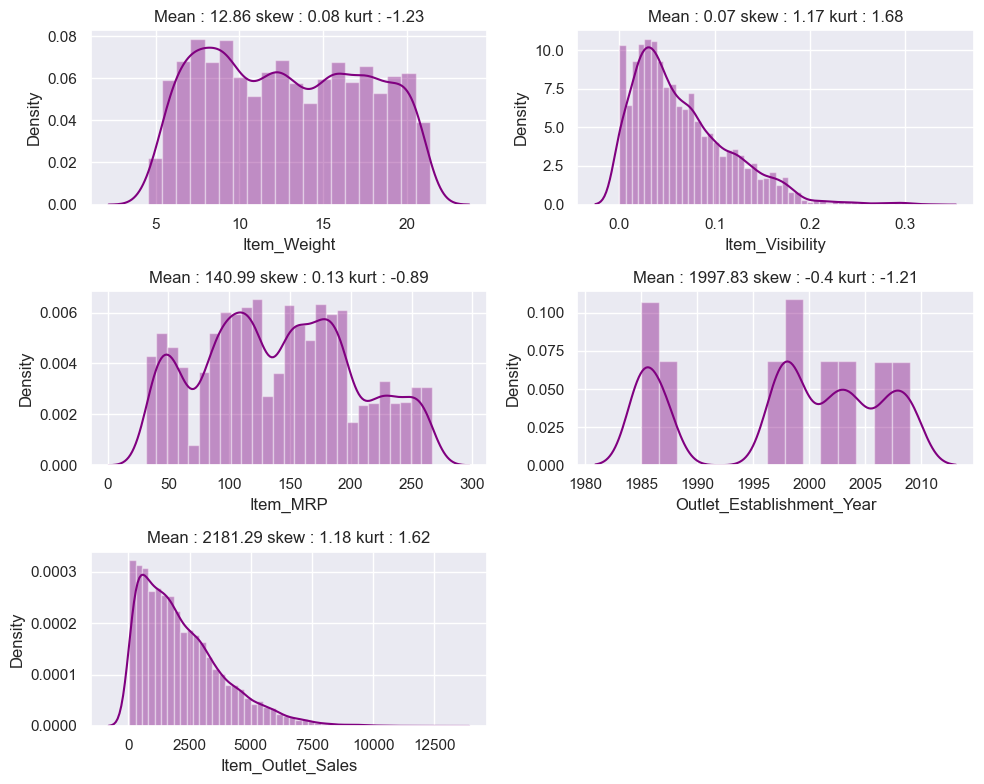

In [6]:
uni(df,3,2)

* Item Mrp is a multimodal 
* 

it=1
plt.figure(figsize=(13,16))
for i in df.select_dtypes("object").columns:
    plt.subplot(4,2,it)
    sns.countplot(x=df[i])
    it+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
#Missing Values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.loc[:,["Item_Identifier","Item_Weight"]][df["Item_Identifier"]=="FDA15"]
#Since the item weight has same weight for the all item_identifier 
#we can fill the missing values in item_weight based on item id

,Item_Identifier,Item_Weight
0,FDA15,9.3
831,FDA15,9.3
2599,FDA15,9.3
2643,FDA15,9.3
4874,FDA15,9.3
5413,FDA15,9.3
6696,FDA15,NaN
7543,FDA15,9.3


In [9]:
df["Item_Weight"]=df.groupby("Item_Identifier")["Item_Weight"].transform(lambda x : x.fillna(x.median()))

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:

df[df["Item_Weight"].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [12]:
df["Item_Weight"][927]=12.85

In [13]:
df["Item_Weight"][df["Item_Type"]=='Frozen Foods'].median()

12.85

In [14]:
df["Item_Weight"][1922]=13.15

In [15]:
df["Item_Weight"][df["Item_Type"]=='Snack Foods'].median()

13.15

In [16]:
df["Item_Weight"][4187]=13.35

In [17]:
df["Item_Weight"][df["Item_Type"]=='Dairy'].median()

13.35

In [18]:
df["Item_Weight"][5022]=11.65

In [19]:
df["Item_Weight"][df["Item_Type"]=='Baking Goods'].median()

11.65

In [20]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
df.iloc[:,-6:]

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...
8518,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [22]:
df["Outlet_Size"][df["Outlet_Location_Type"]=="Tier 3"].unique()


array(['Medium', nan, 'High'], dtype=object)

In [23]:
df["Outlet_Size"][df["Outlet_Location_Type"]=="Tier 2"].unique()


array([nan, 'Small'], dtype=object)

In [24]:
df["Outlet_Size"][df["Outlet_Location_Type"]=="Tier 1"].unique()


array(['Medium', 'Small'], dtype=object)

In [25]:
df["Outlet_Size"]=df.groupby("Outlet_Location_Type")["Outlet_Size"].transform(lambda x : x.fillna(x.mode()[0]))

In [26]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
df.drop(["Outlet_Identifier"],axis=1,inplace=True)

In [29]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [30]:
df["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"},inplace=True)

In [31]:
from scipy.stats import boxcox,yeojohnson

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

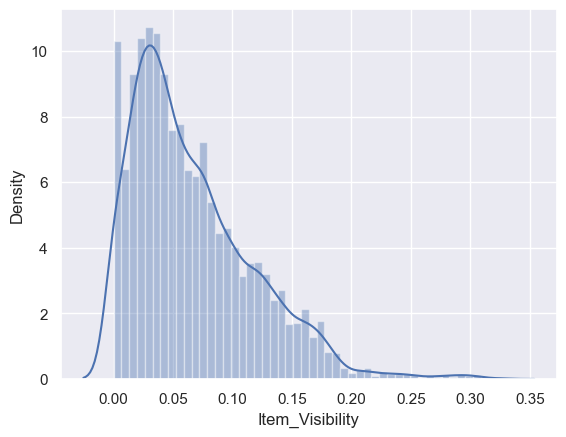

In [32]:
sns.distplot(df["Item_Visibility"])

<AxesSubplot:ylabel='Density'>

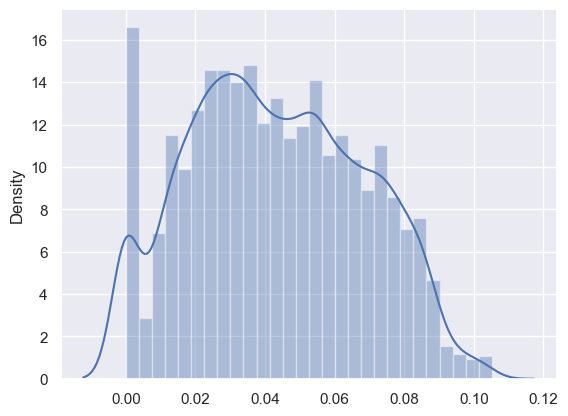

In [33]:
sns.distplot(yeojohnson(df["Item_Visibility"])[0])

In [34]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [35]:
df.to_csv("new_train",index=False)

In [36]:
pd.read_csv("new_train")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976
